In [1]:
import optimization as opt
import stock_work as sw
import pickle
import backtesting as bt
import matplotlib.pyplot as plt

In [2]:
sp500_tickers = sw.get_sp500_tickers()

In [ ]:
try:
    with open("data.pkl", "rb") as f:
        data = pickle.load(f)

    stocks = data["stocks"]
    factors = data["factors"]

except:
    stocks, _ = sw.get_data(sp500_tickers)
    factors, _ = sw.get_factors()

with open("data.pkl", "wb") as f:
    pickle.dump({"stocks": stocks, "factors": factors}, f)

tickers = stocks.columns

alphas, betas, idios, cov = sw.regression_results(stocks, factors)
target_betas = [.01, -.01, .01, -.01, .01, -.01, .01, -.01, .01, -.01, .01]

print(alphas.shape, betas.shape, idios.shape, cov.shape)

/Users/dipalshah/Desktop/optimized_vector_add/stock_work.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_list, interval = interval, period = "max", group_by = "ticker")
[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1m 2025-08-31 19:00:19-04:00 -> 2025-09-08 19:00:14-04:00)')
/Users/dipalshah/Desktop/optimized_vector_add/stock_work.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_list, interval = interval, period = "max", group_by = "ticker")
[*********************100%***********************]  11 of 11 completed


LinAlgError: Singular matrix

In [ ]:
betas.T

array([[-0.02490283,  0.18747551,  0.89380118, ...,  0.25283759,
         0.01098732, -0.06096393],
       [ 0.11704061, -0.07903348, -0.23228917, ..., -0.43634674,
         0.90760748,  0.30929299],
       [-0.14061223, -0.02389849, -0.09127643, ..., -0.18084478,
         0.31852325,  0.13935693],
       ...,
       [-0.14649939,  0.2071254 ,  0.13124629, ...,  0.32050706,
        -0.13014044,  0.62544539],
       [ 0.08745059,  0.09712324, -0.02981003, ...,  0.3533477 ,
        -0.1634047 ,  0.31893856],
       [-0.10529754,  0.23770552,  0.3271195 , ...,  0.1530496 ,
        -0.13235385,  0.12964044]])

In [ ]:
vector_sum, betas, error, variance, iters = opt.optimize_constrainted_vector_sum(betas.T, target_betas, cov, idios, variance_bias = 0)

In [ ]:
print("vector_sum:   ", vector_sum)
print("final_vector: ", betas)
print("error:        ", error)
print("variance:     ", variance)
print("iterations:   ", iters)

vector_sum:    [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.06538879e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.78620187e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.97129948e-01  1.72404448e-04 -2.31589014e-04
  0.000000

In [ ]:
print("Portfolio: ")
used_tickers = []
for ticker, weight in zip(tickers, vector_sum):
    if weight:
        print(f" {ticker:>5} > {weight * 100:3.3f}%")
        used_tickers.append(ticker)

Portfolio: 
   TKO > -0.407%
   AMP > -0.048%
  FICO > -19.713%
  ALGN > 0.017%
   NEM > -0.023%
  ODFL > -4.006%
  MSCI > 1.945%
   XYZ > -4.228%
  EBAY > 7.348%
    CB > -0.153%
    BX > -0.018%
   MOS > -0.896%
   TAP > -0.646%
   TER > 15.582%
  TROW > 0.202%
   ADI > 0.065%
    EA > -6.838%
   OXY > 37.865%


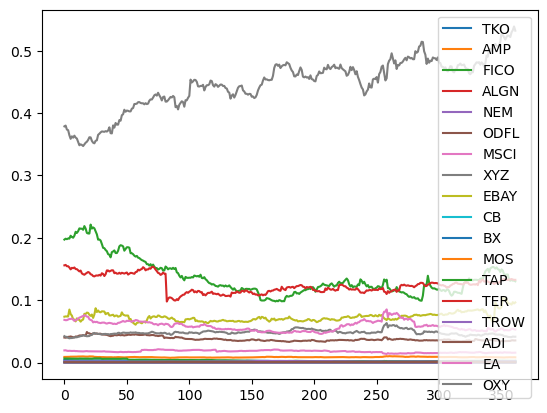

Final Portofolio Value:  1.0545422572182588


In [ ]:
portfolio_value = 0
for ticker, stock in zip(used_tickers, bt.backtest_simple(stocks, vector_sum)):
    plt.plot(stock, label = ticker)
    portfolio_value += stock[-1]

plt.legend()
plt.show()

print("Final Portofolio Value: ", portfolio_value)